In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 전처리

In [2]:
data1 = pd.read_csv('도로교통공단_교통사고다발지역_20191010.csv', engine='python')
data2 = pd.read_csv('서울특별시 공공자전거 대여소 정보_20191209_csv.csv', engine='python')
data3 = pd.read_csv('서울형 지도태깅 자전거 편의시설 정보.csv', engine='python')

In [3]:
data1.head()

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10
4,2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10


In [4]:
data1_sub = data1[(data1['사고년도'] == 2018) & (data1['사고유형구분'] == '자전거')]
data1_sub.index = range(len(data1_sub))

In [5]:
idx = []

for i, sido in enumerate(data1_sub['시도시군구명']):
    if '서울특별시' in sido:
        idx.append(i)

In [6]:
data1_sub = data1_sub.loc[idx]

In [7]:
data1_sub['구명'] = data1_sub['시도시군구명'].map(lambda x : x.split(' ')[1].rstrip('0123456789'))

In [8]:
gu_accident = data1_sub.groupby('구명')['발생건수'].sum()

In [9]:
data2.head()

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43,14
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44,13
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45,5


In [10]:
gu_rental = data2.groupby('대여소_구')['대여소_구'].count()

In [11]:
data2['거치대수'] = data2['거치대수'].map(lambda x : x.replace(',', ''))
data2['거치대수'] = data2['거치대수'].astype('int')

In [12]:
gu_num_bicycle = data2.groupby('대여소_구')['거치대수'].sum()

In [13]:
data3.head()

,새주소,지번주소,좌표정보,좌표정보.1,테마코드,콘텐츠 코드,"언어셋(KOR : 국문, ENG : 영문, JP : 일문, CHA : 중문-간체, CHB : 중문-번체)",콘텐츠 명,시도명(텍스트),구명,...,상세정보 이름 18,상세정보 이름 19,상세정보 이름 20,좌표데이터,좌표 타입 (1:Point 3:Polyline 4:MultiPolyline 5:Polygon 6:MultiPolygon 8:multiPoint),선 두께 1~10,테마 선 색상,키워드,등록일,수정일
0,NaN,NaN,NaN,NaN,100235,AR000077,KOR,7호선 청담역13번출구,NaN,강남구,...,NaN,NaN,NaN,NaN,1,4,#0000FF,NaN,2016-12-06 15:20:11.0,2016-12-06 15:20:11.0
1,NaN,NaN,NaN,NaN,100235,AR000147,KOR,방화역(3번 출구),NaN,강서구,...,NaN,NaN,NaN,NaN,1,4,#0000FF,NaN,2016-12-06 15:20:10.0,2016-12-06 15:20:10.0
2,NaN,NaN,NaN,NaN,100235,AR000148,KOR,암사역(1번 출구),NaN,강동구,...,NaN,NaN,NaN,NaN,1,4,#0000FF,NaN,2016-12-06 15:20:10.0,2016-12-06 15:20:10.0
3,NaN,NaN,NaN,NaN,100235,AR000149,KOR,둔촌동역(1번 출구),NaN,강동구,...,NaN,NaN,NaN,NaN,1,4,#0000FF,NaN,2016-12-06 15:20:10.0,2016-12-06 15:20:10.0
4,NaN,NaN,NaN,NaN,100235,AR000150,KOR,굽은다리역(1번 출구),NaN,강동구,...,NaN,NaN,NaN,NaN,1,4,#0000FF,NaN,2016-12-06 15:20:10.0,2016-12-06 15:20:10.0


In [14]:
gu_num_conv = data3.groupby('구명')['구명'].count()

In [15]:
gu_accident # 중구 0

구명
강남구       8
강동구      27
강북구      16
강서구      11
관악구       8
광진구      23
구로구      16
금천구      10
노원구      31
도봉구      20
동대문구     52
동작구      25
마포구       6
서대문구      5
서초구       4
성동구      22
성북구      24
송파구     109
양천구      29
영등포구     75
용산구       8
은평구      27
종로구       4
중랑구      30
Name: 발생건수, dtype: int64

In [16]:
gu_rental = gu_rental[:-1]

In [17]:
gu_num_bicycle = gu_num_bicycle[:-1]

In [18]:
gu_accident.shape, gu_rental.shape, gu_num_bicycle.shape, gu_num_conv.shape

((24,), (25,), (25,), (25,))

In [19]:
data4 = pd.read_csv('자전거 이용률 통계.txt', sep='\t')

In [20]:
data4

,기간,대분류,분류,합계,이동 수단으로 이용,운동 수단으로 이용,이용하지 않음
0,2018,서울시,서울시,100,5.5,14.9,79.7
1,2018,성별,남자,100,6.9,19.9,73.2
2,2018,성별,여자,100,4.2,10.1,85.7
3,2018,연령별,10대,100,12.0,25.1,62.9
4,2018,연령별,20대,100,6.1,20.7,73.2
5,2018,연령별,30대,100,4.3,17.6,78.1
6,2018,연령별,40대,100,6.2,15.9,77.9
7,2018,연령별,50대,100,4.6,12.5,82.9
8,2018,연령별,60대 이상,100,4.4,6.7,88.9
9,2018,학력별,중졸 이하,100,3.8,5.0,91.2


In [21]:
total = data4.loc[28:52, ['분류', '이동 수단으로 이용', '운동 수단으로 이용']]
total

,분류,이동 수단으로 이용,운동 수단으로 이용
28,종로구,2.3,14.0
29,중구,4.9,7.3
30,용산구,4.2,10.2
31,성동구,5.8,13.7
32,광진구,6.4,19.1
33,동대문구,9.2,10.2
34,중랑구,3.7,16.8
35,성북구,7.2,13.6
36,강북구,4.9,7.5
37,도봉구,3.3,10.0


In [22]:
data5 = pd.read_csv('자전거 도로 현황 통계.txt', sep='\t')

In [23]:
data5_sub = data5.loc[3:27, ['자치구(2)', '합계.1']]
data5_sub.columns = ['분류', '전용도로길이']

In [24]:
total = pd.merge(total, data5_sub, how='left', on='분류')

In [25]:
total = total.rename(columns={'분류': '구명'})

In [26]:
total = pd.merge(total, gu_accident.reset_index(), how='left', on='구명').fillna(0)

In [27]:
temp = pd.DataFrame([gu_rental, gu_num_bicycle, gu_num_conv]).T

In [28]:
temp.columns = ['대여소수', '자전거수', '편의시설수']

In [29]:
temp['구명'] = temp.index

In [30]:
total = pd.merge(total, temp, how='left', on='구명').fillna(0)

In [31]:
total['발생건수'] = total['발생건수'].astype('int')

In [32]:
total

,구명,이동 수단으로 이용,운동 수단으로 이용,전용도로길이,발생건수,대여소수,자전거수,편의시설수
0,종로구,2.3,14.0,23.7,4,68,784,59
1,중구,4.9,7.3,15.4,0,43,493,38
2,용산구,4.2,10.2,22.1,8,39,538,33
3,성동구,5.8,13.7,20.6,22,63,780,57
4,광진구,6.4,19.1,29.8,23,59,841,30
5,동대문구,9.2,10.2,24.3,52,51,659,41
6,중랑구,3.7,16.8,6.1,30,52,616,7
7,성북구,7.2,13.6,8,24,58,726,3
8,강북구,4.9,7.5,7,16,39,451,7
9,도봉구,3.3,10.0,12.3,20,33,396,5


# PCA

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
total_std = scaler.fit_transform(total.iloc[:, 1:])

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
total_pca = pca.fit_transform(total_std)

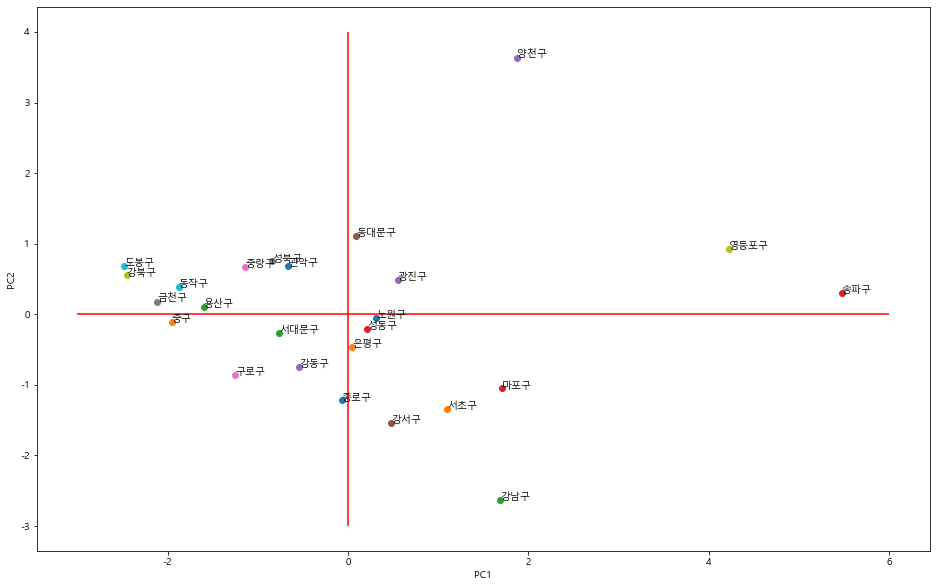

In [35]:
plt.figure(figsize=(16, 10))

for i in range(0, len(total_pca)):
    plt.scatter(total_pca[i, 0], total_pca[i, 1]);
    plt.text(total_pca[i, 0], total_pca[i, 1], s=total['구명'][i]);

plt.vlines(0, -3, 4, colors='r')
plt.hlines(0, -3, 6, colors='r')
plt.xlabel('PC1');
plt.ylabel('PC2');

In [36]:
pd.DataFrame(pca.components_.T, index=total.columns[1:], columns=['PC1', 'PC2'])

,PC1,PC2
이동 수단으로 이용,0.258878,0.636688
운동 수단으로 이용,0.368833,0.406110
전용도로길이,0.446017,-0.081376
발생건수,0.357024,0.311186
대여소수,0.442082,-0.410193
자전거수,0.458130,-0.358505
편의시설수,0.255395,-0.171640


PC1 : 자전거 인프라(전용도로길이, 대여소수, 자전거수)  
-> 자전거 인프라가 충분하면 x축 기준 오른쪽에 존재  
   자전거 인프라가 부족하면 x축 기준 왼쪽에 존재
  
PC2 : 자전거 이용률(이동수단, 운동수단) 대비 자전거 인프라(전용도로길이, 대여소수, 자전거수)  
-> 자전거 이용률이 높고 자전거 인프라도 잘 갖추어져 있으면 y축 기준 가운데 존재  
   자전거 이용률이 높지만 그에 비해 자전거 인프라가 잘 갖추어져 있지 않으면 y축 기준 위에 존재  
   자전거 이용률이 낮지만 그에 비해 자전거 인프라가 잘 갖추어져 있으면 y축 기준 아래에 존재  

In [37]:
total.loc[np.argsort(total['이동 수단으로 이용'] + total['운동 수단으로 이용'])[::-1]]  # 이용률 기준

,구명,이동 수단으로 이용,운동 수단으로 이용,전용도로길이,발생건수,대여소수,자전거수,편의시설수
14,양천구,18.3,26.8,40,29,55,677,26
18,영등포구,11.4,25.0,36.6,75,89,1250,72
23,송파구,7.3,23.2,91.7,109,99,1298,27
20,관악구,3.5,23.0,19.5,8,51,640,12
4,광진구,6.4,19.1,29.8,23,59,841,30
13,마포구,6.7,16.4,33.4,6,79,1075,78
7,성북구,7.2,13.6,8,24,58,726,3
21,서초구,5.4,15.3,23.5,4,89,1227,23
6,중랑구,3.7,16.8,6.1,30,52,616,7
10,노원구,5.3,14.5,28.3,31,68,879,12


In [38]:
total.loc[np.argsort(total['자전거수'])[::-1]]  # 자전거수 기준

,구명,이동 수단으로 이용,운동 수단으로 이용,전용도로길이,발생건수,대여소수,자전거수,편의시설수
23,송파구,7.3,23.2,91.7,109,99,1298,27
18,영등포구,11.4,25.0,36.6,75,89,1250,72
21,서초구,5.4,15.3,23.5,4,89,1227,23
22,강남구,2.8,9.6,52.6,8,99,1218,35
13,마포구,6.7,16.4,33.4,6,79,1075,78
15,강서구,1.9,14.7,27.9,11,85,1002,20
10,노원구,5.3,14.5,28.3,31,68,879,12
4,광진구,6.4,19.1,29.8,23,59,841,30
16,구로구,3.7,6.2,10.9,16,64,788,14
0,종로구,2.3,14.0,23.7,4,68,784,59


In [39]:
total.loc[np.argsort(total_std[:, 4] + total_std[:, 5] + total_std[:, 6])[::-1]]   # 전반적인 인프라 기준

,구명,이동 수단으로 이용,운동 수단으로 이용,전용도로길이,발생건수,대여소수,자전거수,편의시설수
18,영등포구,11.4,25.0,36.6,75,89,1250,72
13,마포구,6.7,16.4,33.4,6,79,1075,78
22,강남구,2.8,9.6,52.6,8,99,1218,35
23,송파구,7.3,23.2,91.7,109,99,1298,27
21,서초구,5.4,15.3,23.5,4,89,1227,23
0,종로구,2.3,14.0,23.7,4,68,784,59
15,강서구,1.9,14.7,27.9,11,85,1002,20
3,성동구,5.8,13.7,20.6,22,63,780,57
11,은평구,2.9,14.7,26.9,27,63,716,46
4,광진구,6.4,19.1,29.8,23,59,841,30


# K-means cluster

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(total_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [42]:
df_pca = pd.DataFrame(total_pca)
df_pca.columns = ['PC1', 'PC2']
df_pca['cluster'] = kmeans.predict(total_pca)

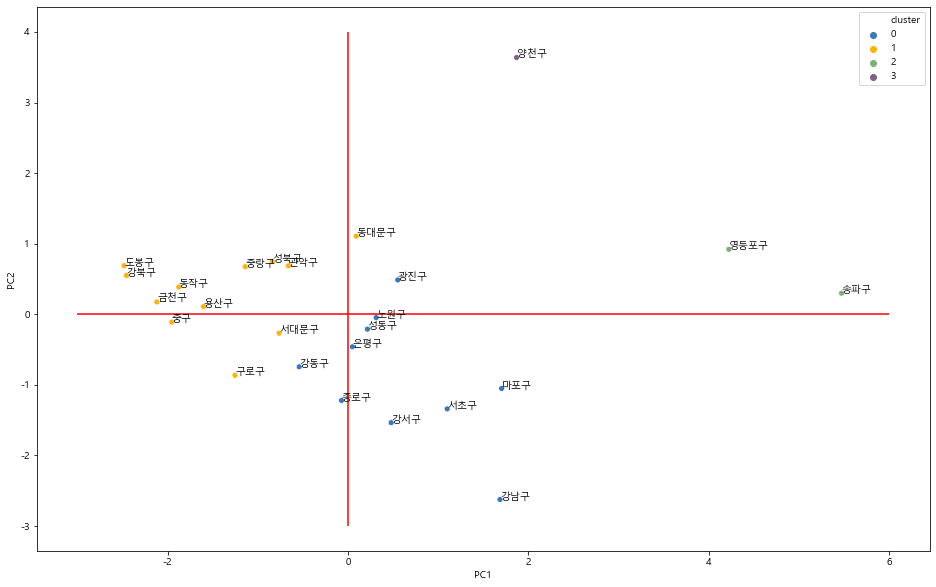

In [43]:
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.scatterplot('PC1', 'PC2', hue='cluster', data=df_pca, palette=sns.xkcd_palette(['windows blue', 'amber', 'faded green', 'dusty purple']));
for i in range(0, len(total_pca)):
    plt.text(total_pca[i, 0], total_pca[i, 1], s=total['구명'][i]);

plt.vlines(0, -3, 4, colors='r')
plt.hlines(0, -3, 6, colors='r')
plt.xlabel('PC1');
plt.ylabel('PC2');

그룹0 : 자전거 이용률도 적고, 인프라도 적은 구  -> 이상적  
그룹1 : 자전거 이용률에 비해 인프라가 많은 구  -> 인프라 충분  
그룹2 : 자전거 이용률도 높고, 인프라도 많은 구  -> 이상적  
그룹3 : 자전거 이용률에 비해 인프라가 적은 구  -> 더 많은 인프라 필요  